# Data collection from IRIS webservice using obspy
Many seismological data centers provide public access to their data using a FDSN webservice. Using this webservice, information about station metadata and timeseries can be downloaded.

The Python package [obspy](http://www.obspy.org) provides tools for an easy access to this dtaa. In this example I'm using the obspy [FDSN Client](http://docs.obspy.org/packages/obspy.clients.fdsn.html#module-obspy.clients.fdsn) to get archived data.

## Import of Python Packages

In [1]:
%reload_ext autoreload
%autoreload 2

# Access to operation system functionality.
import os

# Third party packages
# Plotting.
import matplotlib as mpl
import matplotlib.pyplot as plt
# Numerical computation.
import numpy as np
# Scientific computation.
import scipy as sp
import scipy.signal
# Seismological data handling and processing.
import obspy

## Notebook Configuration

In [2]:
config = {}
config['data_dir'] = '../data'
config['fig_dir'] = '../figures'

plt.rcParams['figure.figsize'] = [15, 10]

## Create the FDSN Client

Create the client for the [IRIS Datenzentrums](https://www.iris.edu) webservice. The string 'IRIS', used to create the client instance, is translated to the related URL of the Webservice (see http://docs.obspy.org/packages/obspy.clients.fdsn.html#module-obspy.clients.fdsn).

In [3]:
import obspy.clients.fdsn
client = obspy.clients.fdsn.Client('IRIS')

## Request the Available Networks
The function *get_stations* can be used to get all available stations. The keyword *level* can be used to limit the level of details of the station metadata. This is useful to avoid downloading too much data. The keywords *starttime* and *endtime* specify the timerange for which the stations should be available.

The requested data is returned by the function *get_station* as an [obspy.core.inventory.Inventory](http://docs.obspy.org/packages/obspy.core.inventory.html#module-obspy.core.inventory) instance.

In [4]:
inventory = client.get_stations(level = 'network',
                                starttime = obspy.UTCDateTime('2018-01-01'))
print([x.code for x in inventory.networks])

['1A', '1A', '1B', '1D', '1E', '1F', '1G', '1H', '1J', '1K', '1L', '1L', '1M', '1P', '1Q', '1Q', '1U', '1V', '2A', '2B', '2E', '2F', '2F', '2H', '2J', '2K', '2L', '2M', '2O', '2P', '2Q', '2U', '2V', '2V', '3A', '3A', '3A', '3A', '3B', '3B', '3C', '3C', '3D', '3E', '3E', '3F', '3H', '3J', '3J', '3K', '3L', '3R', '3U', '3Y', '4A', '4A', '4B', '4F', '4J', '4N', '4P', '4P', '4Q', '4S', '4T', '4U', '4Y', '5A', '5F', '5H', '5K', '5K', '5K', '5L', '5L', '5L', '5O', '5P', '5W', '6A', '6C', '6D', '6F', '6H', '6J', '6K', '6L', '6L', '6M', '6O', '6Q', '6Q', '6R', '6W', '7B', '7C', '7D', '7D', '7F', '7G', '7G', '7I', '7K', '7O', '7P', '7Q', '7S', '7T', '7T', '8A', '8A', '8A', '8E', '8F', '8G', '8H', '8J', '8L', '8L', '8P', '8Q', '8S', '8U', '8W', '9C', '9F', '9K', '9L', '9M', '9P', '9P', '9R', 'A2', 'A7', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AI', 'AK', 'AM', 'AO', 'AP', 'AR', 'AT', 'AU', 'AV', 'AX', 'AY', 'AZ', 'BC', 'BE', 'BI', 'BK', 'BL', 'BN', 'BV', 'BX', 'C', 'C0', 'C1', 'C8', 'CA', 'CB', 'CC'

## Get the Stations of a Network
Multiple networks are often combined to a virual network. I'm working in this example with the GSN, the Global Seismic Network, which is defined as a virtual network.

In [5]:
inventory = client.get_stations(network = '_GSN',
                                level = 'station',
                                starttime = obspy.UTCDateTime('2018-01-01'))
print(inventory)

Inventory created at 2024-08-29T10:13:18.182100Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2018-01-...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (11):
			AU, BK, CI, CU, GT, HK, IC, II, IM, IU, MS
		Stations (211):
			AU.MCQ (Macquarie Island)
			BK.CMB (Columbia College, Columbia, CA, USA)
			CI.PASC (Art Center College of Design (GSN-affiliate))
			CU.ANWB (North Barbuda Island)
			CU.BBGH (Gun Hill, Barbados)
			CU.BCIP (Isla Barro Colorado, Panama)
			CU.GRGR (Grenville, Grenada)
			CU.GRTK (Grand Turk, Turks and Caicos Islands)
			CU.GTBY (Guantanamo Bay, Cuba)
			CU.MTDJ (Mount Denham, Jamaica)
			CU.SDDR (Presa de Sabenta, Dominican Republic)
			CU.TGUH (Tegucigalpa, Honduras)
			GT.LBTB (Lobatse, Botswana)
			GT.VNDA (Dry Valley, Vanda, Antarctica)
			HK.HKPS (Po Shan, Hong Kong)
			IC.BJT (Baijiatuan, Beijing, China)
			IC.ENH (Enshi, Hubei Province, China)
			IC.HIA (Hai

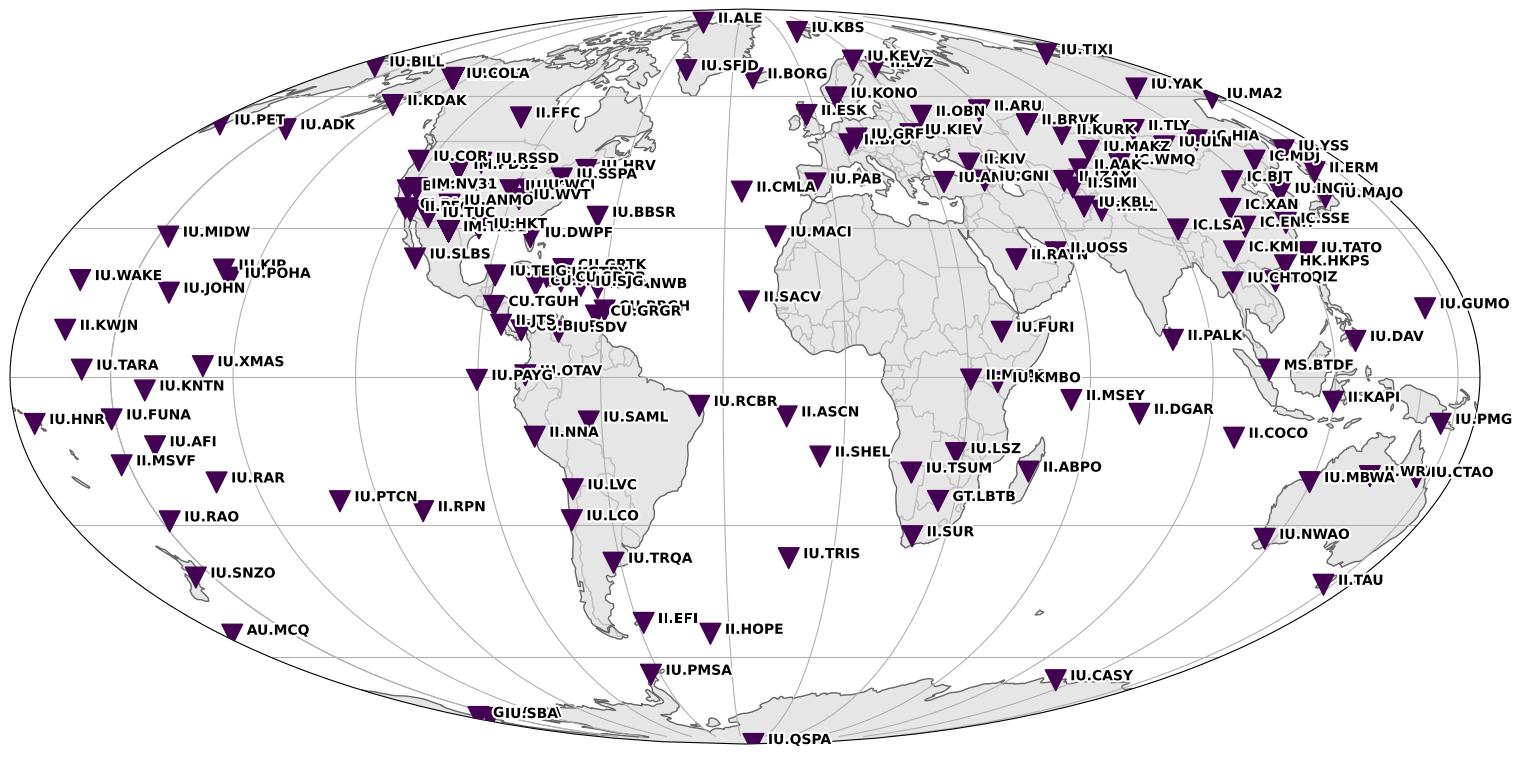

In [6]:
inventory.plot(color = 0)
plt.show()

## Get the seismic events of an earthquake catalog
Seismic events can be retrieved using the *get_events* function of the client instance. The result is returned as an [obspy.core.event.Catalog](http://docs.obspy.org/packages/autogen/obspy.core.event.Catalog.html#obspy.core.event.Catalog) instance.

In [7]:
# Zeitspanne von einer Stunde ab der aktuellen Zeit.
request_end = obspy.UTCDateTime()
request_start = request_end - 3600
cat = client.get_events(starttime = request_start,
                        endtime = request_end)
print(cat)

22 Event(s) in Catalog:
2024-08-29T10:01:12.950000Z | +35.948, -117.682 | 0.59 Ml
2024-08-29T10:00:40.341000Z | +37.758, -117.120 | 0.9  ml
...
2024-08-29T09:15:14.090000Z | +33.714, -116.767 | 0.56 Ml
2024-08-29T09:14:30.390000Z | +33.791, -116.058 | 0.91 Ml
To see all events call 'print(CatalogObject.__str__(print_all=True))'


In [8]:
# Zeitspanne von 30 Tagen ab der aktuellen Zeit und mit einer
# Magnitude von mindestens 6.
request_start = request_end - 30 * 86400
min_mag = 6
cat = client.get_events(starttime = request_start,
                        endtime = request_end,
                        minmagnitude = min_mag)
print(cat)

9 Event(s) in Catalog:
2024-08-28T21:57:56.843000Z | +12.998,  -89.562 | 6.1  Mww
2024-08-25T23:30:52.362000Z | -19.798, -174.918 | 6.1  mb
2024-08-25T23:29:08.764000Z | -19.755, -175.041 | 6.9  mww
2024-08-17T19:10:26.707000Z | +52.924, +160.141 | 7.0  Mww
2024-08-15T23:35:53.971000Z | +23.747, +121.772 | 6.1  mww
2024-08-10T03:28:32.905000Z | +47.178, +144.763 | 6.5  mww
2024-08-08T07:42:55.213000Z | +31.754, +131.512 | 7.1  mww
2024-08-03T04:20:26.609000Z |  +8.170, +126.764 | 6.3  mww
2024-08-02T22:23:02.550000Z |  +8.181, +126.615 | 6.8  mww


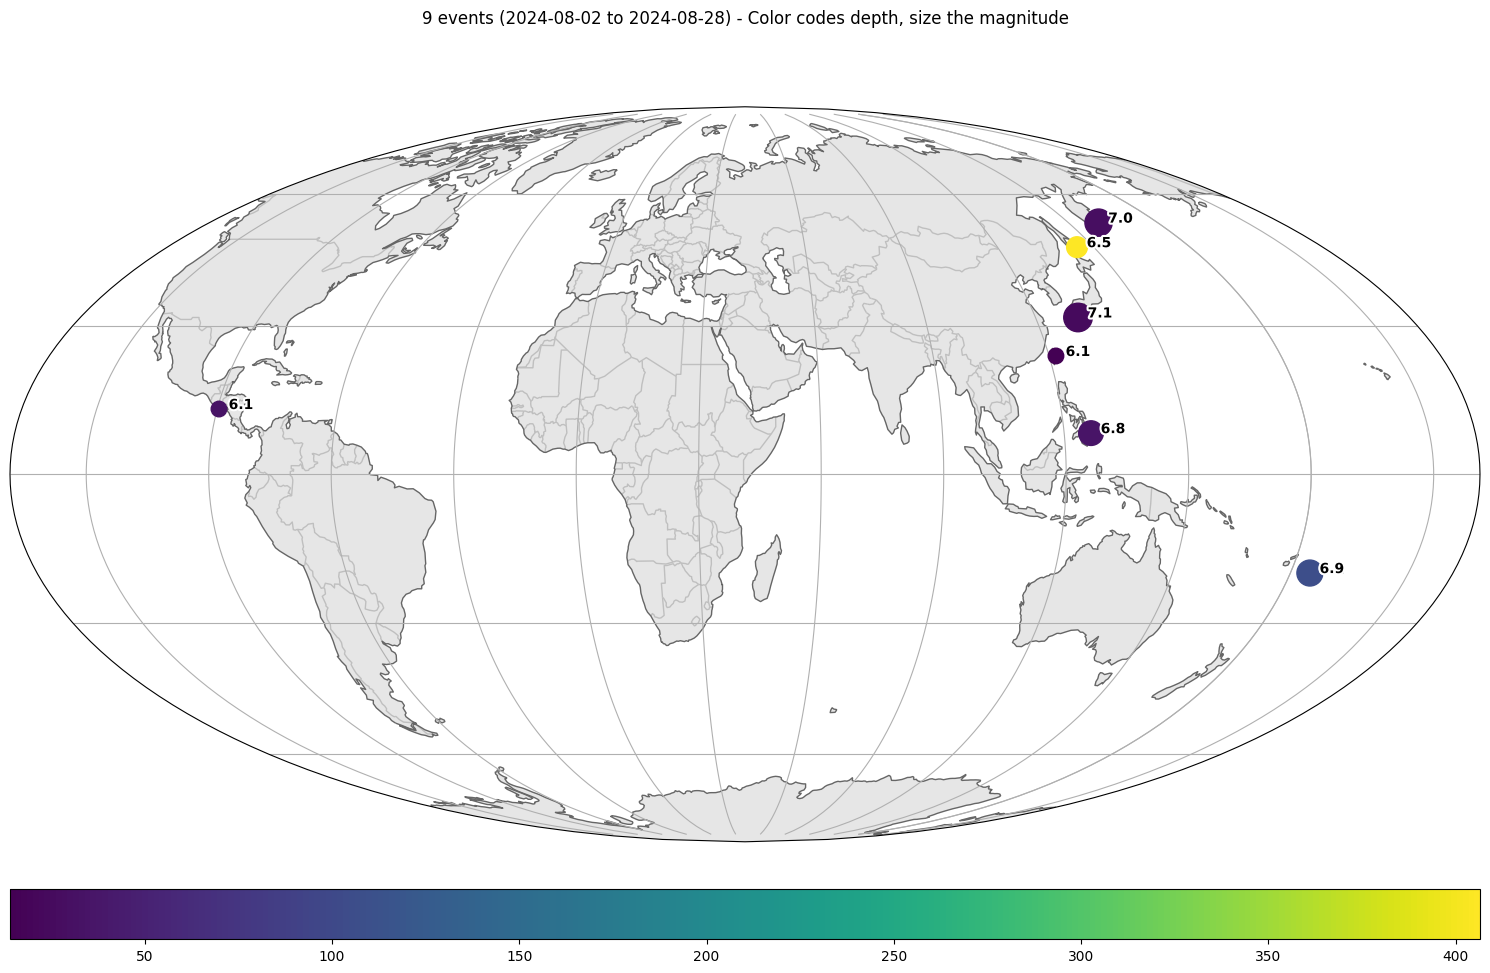

In [9]:
cat.plot()
plt.show()

Important parameters like the hypocentrum or the magnitude can be accessed using dedicated instances within the event instance. For each event, there are multiple locations and magnitudes available. These are created by various seismological observatories. The valid location (origin in obspy) and magnitude can be accessed using the functions *preferred_magnitude()* and *preferred_origin()*.

In [10]:
# Sortieren der Ereignisse entsprechend der Magnitude und Auswahl 
# des stärksten Ereignisses für die weitere Verarbeitung.
sorted_events = sorted(cat,
                       key = lambda x: x.preferred_magnitude().mag,
                       reverse = True)
event = sorted_events[0]
print(event)

Event:	2024-08-08T07:42:55.213000Z | +31.754, +131.512 | 7.1  mww

	            resource_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?eventid=11871818")
	             event_type: 'earthquake'
	    preferred_origin_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?originid=50584522")
	 preferred_magnitude_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?magnitudeid=216392221")
	                   ---------
	     event_descriptions: 1 Elements
	                origins: 1 Elements
	             magnitudes: 1 Elements


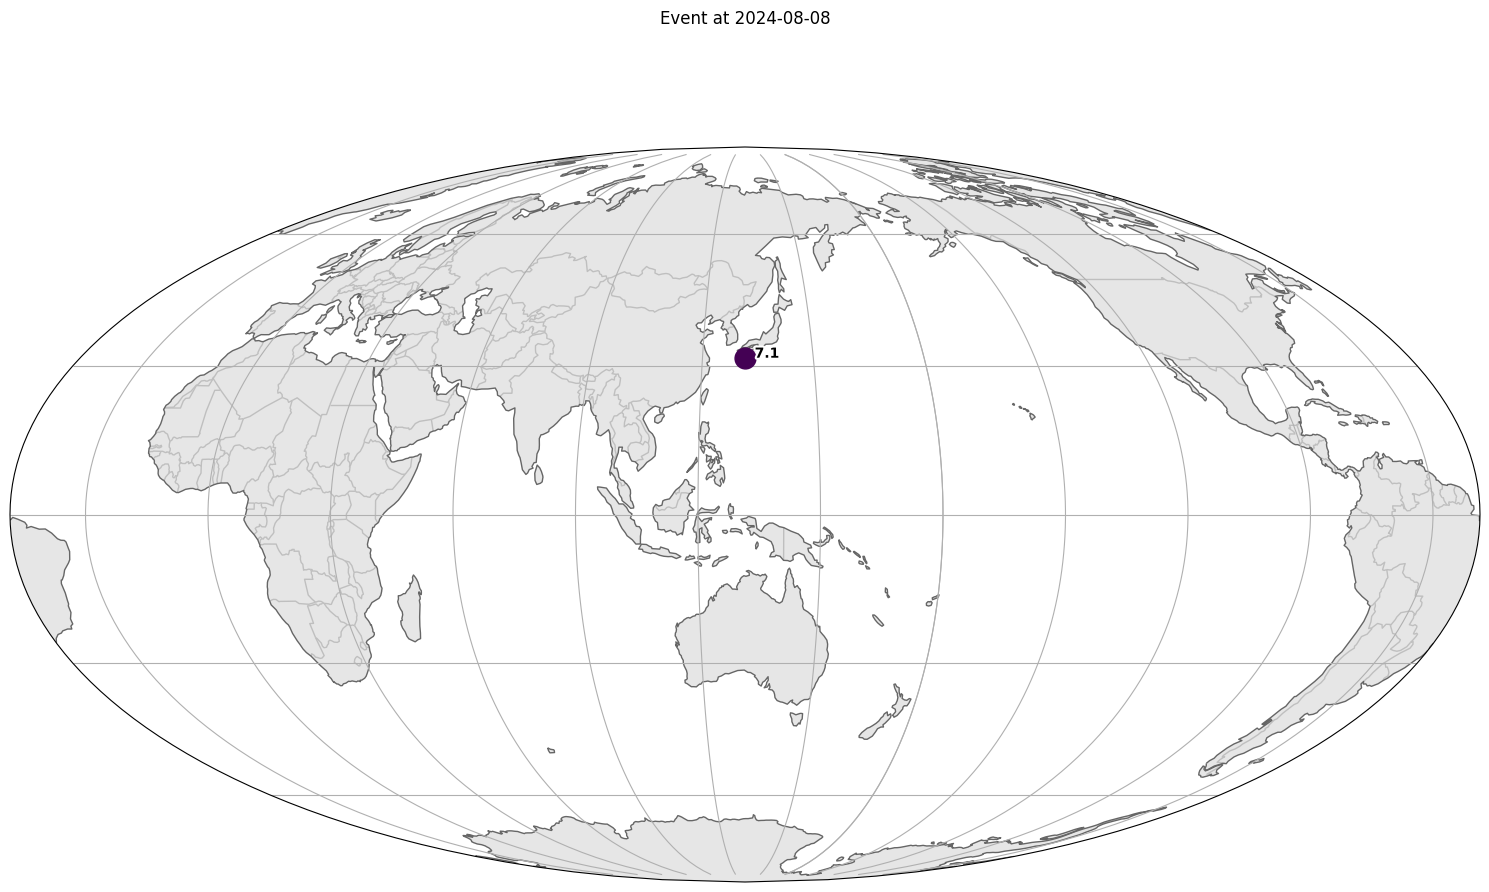

In [11]:
cat.filter('magnitude > 7').plot()
plt.show()

## Get seismograms from the Webservice
I'd like to get the data of 3 stations nearby the earthquake epicenter. I'm selecting the station names from the map and request the available channels for these stations. In case that the stations are contained in different networks, the network names can be given a comma separated string in the *get_stations* station keyword argument.

Using the *level = channel*, all available channels of the stations are requested. The naming of the channels follow the SEED Standard: https://ds.iris.edu/ds/nodes/dmc/data/formats/seed-channel-naming/.

By setting the start- and endtime, only those stations and channels, that were active during this period are returned.

In [12]:
inventory = client.get_stations(network = 'IU,II', 
                                station = 'PMG,DAV,KAPI',
                                level = 'channel',
                                starttime = event.preferred_origin().time - 1800,
                                endtime = event.preferred_origin().time + 1800)
print(inventory)

Inventory created at 2024-08-29T10:13:28.245600Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2024-08-...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (2):
			II, IU
		Stations (3):
			II.KAPI (Kappang, Sulawesi, Indonesia)
			IU.DAV (Davao, Philippines)
			IU.PMG (Port Moresby, New Guinea)
		Channels (134):
			II.KAPI.00.BHZ, II.KAPI.00.BH1, II.KAPI.00.BH2, II.KAPI.00.ENZ, 
			II.KAPI.00.EN1, II.KAPI.00.EN2, II.KAPI.00.LCE, II.KAPI.00.LCQ, 
			II.KAPI.00.LDI, II.KAPI.00.LHZ, II.KAPI.00.LH1, II.KAPI.00.LH2, 
			II.KAPI.00.LNZ, II.KAPI.00.LN1, II.KAPI.00.LN2, II.KAPI.00.VCO, 
			II.KAPI.00.VEA, II.KAPI.00.VEC, II.KAPI.00.VEP, II.KAPI.00.VHZ, 
			II.KAPI.00.VH1, II.KAPI.00.VH2, II.KAPI.00.VKI, II.KAPI.00.VMU, 
			II.KAPI.00.VMV, II.KAPI.00.VMW, II.KAPI.01.AE2, II.KAPI.01.AEC, 
			II.KAPI.02.AEC, II.KAPI.02.AEV, II.KAPI.10.BHZ, II.KAPI.10.BH1, 
			II.KAPI.10.BH2, II.KAPI.10.LCE, II.KAPI.10

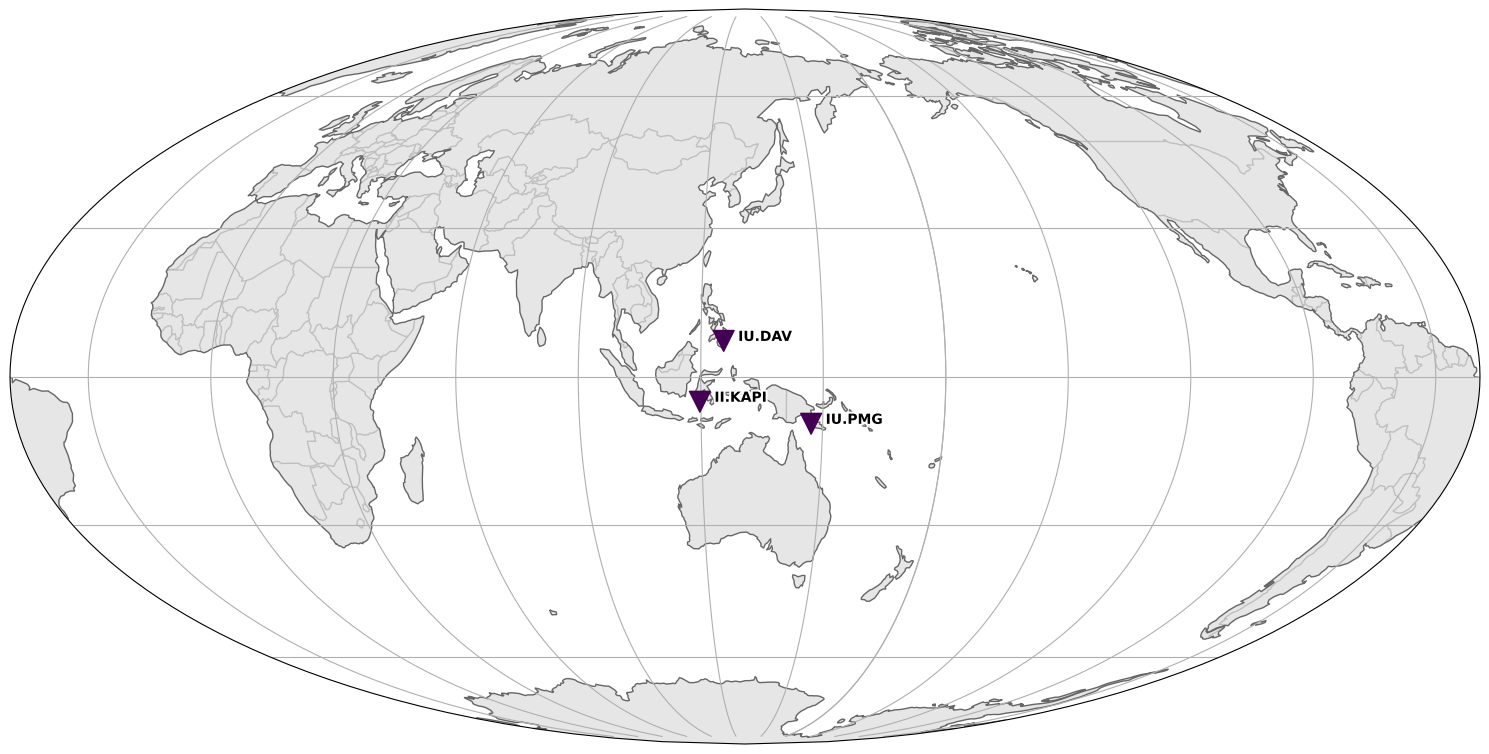

In [13]:
inventory.plot(color = 0)
plt.show()

In [14]:
tmp = inventory[0].stations[0].channels[2]
tmp.sensor
[(x.location_code, x.code, x.sample_rate, x.sensor.description) for x in inventory[1].stations[1].channels]

[('00', 'BH1', 20.0, 'Streckeisen STS-1VBB w/E300'),
 ('00', 'BH2', 20.0, 'Streckeisen STS-1VBB w/E300'),
 ('00', 'BHZ', 20.0, 'Streckeisen STS-1VBB w/E300'),
 ('00', 'LH1', 1.0, 'Streckeisen STS-1VBB w/E300'),
 ('00', 'LH2', 1.0, 'Streckeisen STS-1VBB w/E300'),
 ('00', 'LHZ', 1.0, 'Streckeisen STS-1VBB w/E300'),
 ('00', 'VH1', 0.1, 'Streckeisen STS-1VBB w/E300'),
 ('00', 'VH2', 0.1, 'Streckeisen STS-1VBB w/E300'),
 ('00', 'VHZ', 0.1, 'Streckeisen STS-1VBB w/E300'),
 ('00', 'VM1', 0.1, 'Streckeisen STS-1VBB w/E300'),
 ('00', 'VM2', 0.1, 'Streckeisen STS-1VBB w/E300'),
 ('00', 'VMZ', 0.1, 'Streckeisen STS-1VBB w/E300'),
 ('00', 'VY1', 0.1, 'ProSense PTD25-10-VH vacuum monitor'),
 ('00', 'VY2', 0.1, 'ProSense PTD25-10-VH vacuum monitor'),
 ('00', 'VYZ', 0.1, 'ProSense PTD25-10-VH vacuum monitor'),
 ('10', 'BH1', 40.0, 'Streckeisen STS-2 Standard-gain'),
 ('10', 'BH2', 40.0, 'Streckeisen STS-2 Standard-gain'),
 ('10', 'BHZ', 40.0, 'Streckeisen STS-2 Standard-gain'),
 ('10', 'HH1', 100.0, 

In [15]:
tmp.sample_rate

40.0

The origin time of the event is used as the starttime for the data request.

In [16]:
event.preferred_origin().time

2024-08-08T07:42:55.213000Z

In [17]:
st = client.get_waveforms(network = 'IU,II',
                          station = 'DAV,KAPI,PMG',
                          location = '10',
                          channel = 'BHZ',
                          starttime = event.preferred_origin().time,
                          endtime = event.preferred_origin().time + 3600)
print(st)

3 Trace(s) in Stream:
II.KAPI.10.BHZ | 2024-08-08T07:42:55.219539Z - 2024-08-08T08:42:55.194539Z | 40.0 Hz, 144000 samples
IU.DAV.10.BHZ  | 2024-08-08T07:42:55.219538Z - 2024-08-08T08:42:55.194538Z | 40.0 Hz, 144000 samples
IU.PMG.10.BHZ  | 2024-08-08T07:42:55.219538Z - 2024-08-08T08:42:55.194538Z | 40.0 Hz, 144000 samples


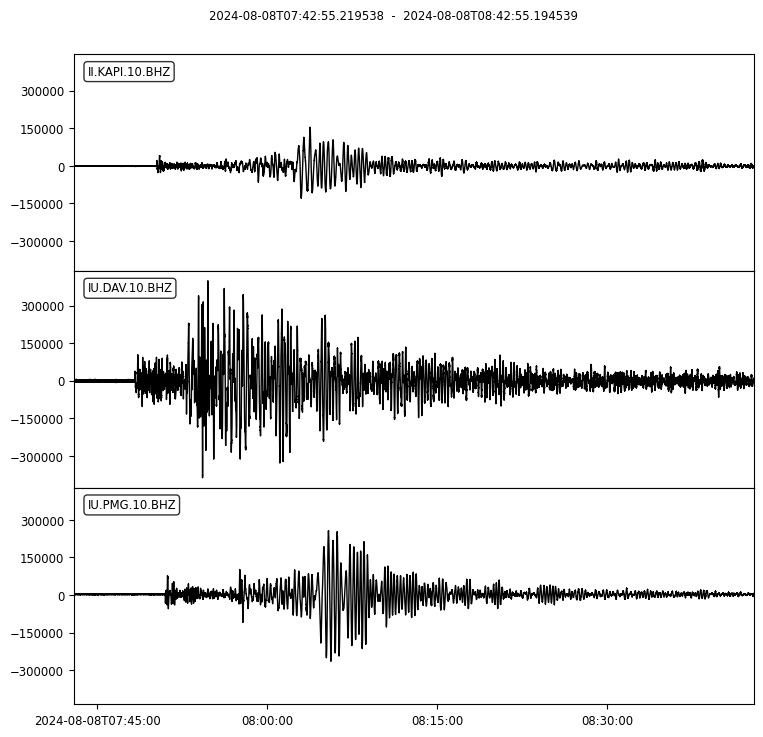

In [18]:
st.plot()
plt.show()

## Compute the spectrogram

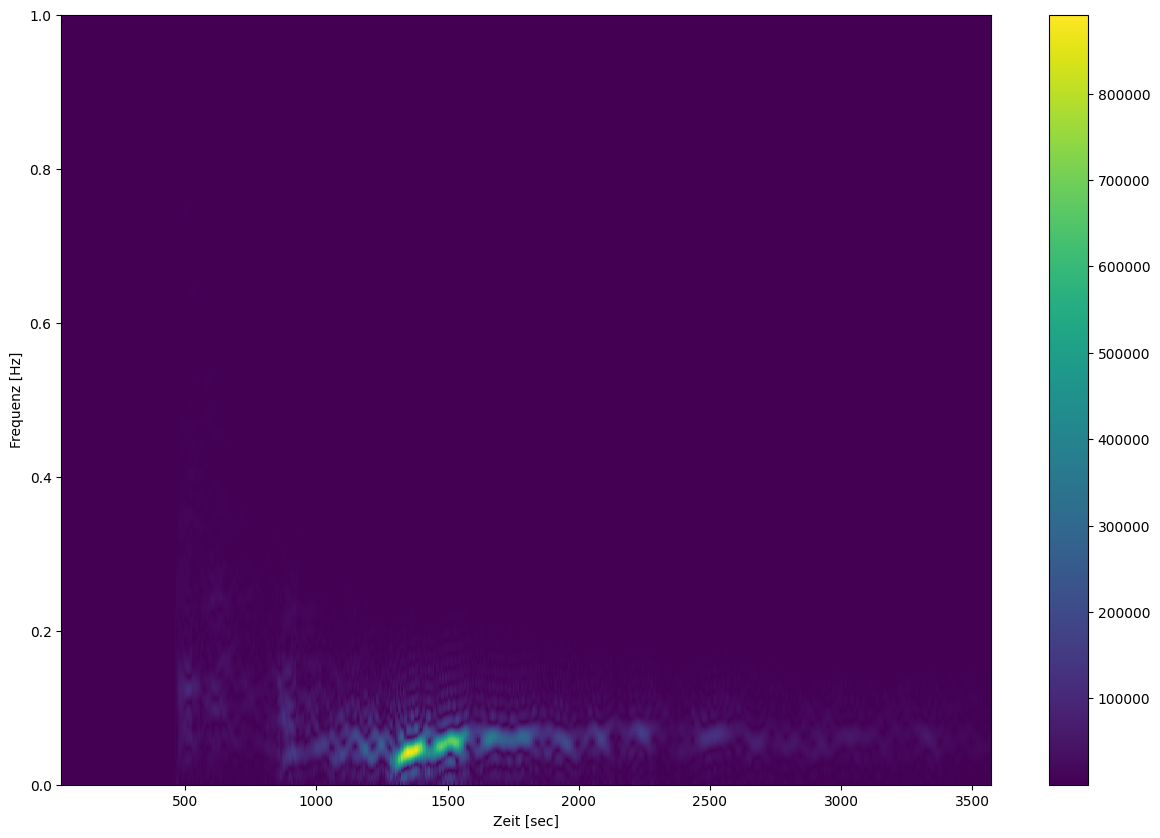

In [19]:
trace = st[2].copy()
trace = trace.resample(2)
sps = trace.stats.sampling_rate

win_len = 60
nfft = 2**12
overlap = 90
nperseg = int(win_len * sps)
noverlap = np.floor(nperseg * overlap/100)
if noverlap == 0:
        noverlap = 1
spec_f, spec_t, spec_S = sp.signal.spectrogram(trace.data, 
                                               fs = sps, 
                                               nperseg = nperseg, 
                                               noverlap = noverlap, 
                                               mode = 'magnitude', 
                                               nfft = nfft,
                                               return_onesided = True)

plt.pcolormesh(spec_t, spec_f, spec_S)
plt.colorbar()
plt.ylabel('Frequenz [Hz]')
plt.xlabel('Zeit [sec]')
plt.show()

## Get a longer timespan for one station
This data is used for audification in another notebook. The data is saved in miniseed format. Miniseed is a standard format for seismic data.

In [20]:
inventory = client.get_stations(network = 'IU', 
                                station = 'PMG',
                                level = 'channel',
                                starttime = event.preferred_origin().time - 1800,
                                endtime = event.preferred_origin().time + 1800)
print(inventory)

Inventory created at 2024-08-29T10:13:36.036700Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2024-08-...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			IU
		Stations (1):
			IU.PMG (Port Moresby, New Guinea)
		Channels (50):
			IU.PMG.00.BHZ, IU.PMG.00.BH1, IU.PMG.00.BH2, IU.PMG.00.LHZ, 
			IU.PMG.00.LH1, IU.PMG.00.LH2, IU.PMG.00.VHZ, IU.PMG.00.VH1, 
			IU.PMG.00.VH2, IU.PMG.00.VMZ, IU.PMG.00.VM1, IU.PMG.00.VM2, 
			IU.PMG.00.VYZ, IU.PMG.00.VY1, IU.PMG.00.VY2, IU.PMG.10.BHZ, 
			IU.PMG.10.BH1, IU.PMG.10.BH2, IU.PMG.10.HHZ, IU.PMG.10.HH1, 
			IU.PMG.10.HH2, IU.PMG.10.LHZ, IU.PMG.10.LH1, IU.PMG.10.LH2, 
			IU.PMG.10.VHZ, IU.PMG.10.VH1, IU.PMG.10.VH2, IU.PMG.10.VMU, 
			IU.PMG.10.VMV, IU.PMG.10.VMW, IU.PMG.20.HNZ, IU.PMG.20.HN1, 
			IU.PMG.20.HN2, IU.PMG.20.LNZ, IU.PMG.20.LN1, IU.PMG.20.LN2, 
			IU.PMG.30.LDO, IU.PMG.31.LDO, IU.PMG.60.BHZ, IU.PMG.60.BH1, 
			IU.PMG.60.BH2, IU.PMG.60

In [21]:
# The time window before and after the event [hour].
win_before = 3
win_after = 4

win_before_sec = win_before * 3600
win_after_sec = win_after * 3600
st = client.get_waveforms(network = 'IU',
                          station = 'PMG',
                          location = '10',
                          channel = 'BHZ',
                          starttime = event.preferred_origin().time - win_before_sec,
                          endtime = event.preferred_origin().time + win_after_sec)
print(st)

1 Trace(s) in Stream:
IU.PMG.10.BHZ | 2024-08-08T04:42:55.219538Z - 2024-08-08T11:42:55.194538Z | 40.0 Hz, 1008000 samples


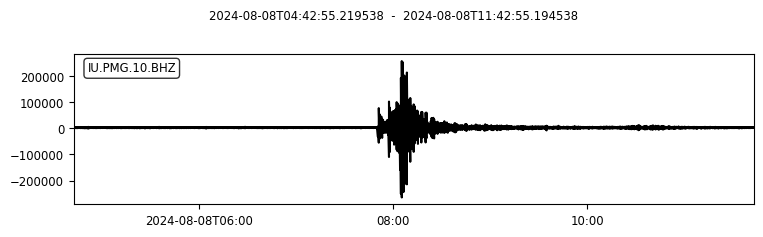

In [22]:
export_trace = st[0]
#export_trace.filter('lowpass',
#                    freq = 0.01)
export_trace.plot()
plt.show()

In [23]:
# Save the data in miniseed format for later use.
output_dir = config['data_dir']
out_filename = 'seismogram_export.msd'
out_path = os.path.join(output_dir,
                        out_filename)

export_trace.write(out_path,
                   format = 'MSEED')